In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

            Time_s  Sensor0_Raw  Sensor1_Raw  DutyCycle  is_from_callback  \
4587  1.736144e+09       1.3613       1.7678       29.0             False   
6932  1.736144e+09       1.3613       1.7678       29.0             False   
3705  1.736144e+09       1.3226       1.6226       63.0             False   
7563  1.736144e+09       1.3710       1.8194        9.0             False   
1591  1.736144e+09       1.3710       1.8161        6.0             False   

      Sensor1_Hist_0  Sensor1_Hist_1  Sensor1_Hist_2  Sensor1_Hist_3  \
4587          1.7645          1.7678          1.7678          1.7678   
6932          1.7645          1.7645          1.7645          1.7678   
3705          1.6194          1.6194          1.6194          1.6226   
7563          1.8194          1.8194          1.8194          1.8194   
1591          1.8161          1.8161          1.8161          1.8161   

      Sensor1_Hist_4  ...  DutyCycle_Hist_0  DutyCycle_Hist_1  \
4587          1.7678  ...              

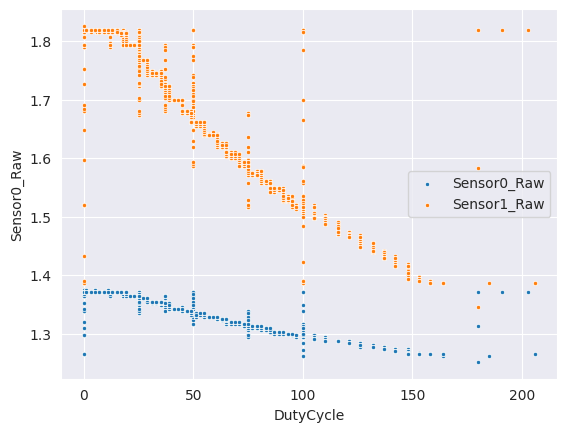

In [46]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))
print(df.shape)

sns.scatterplot(x="DutyCycle", y="Sensor0_Raw", data=df,marker='.',label="Sensor0_Raw")
sns.scatterplot(x="DutyCycle", y="Sensor1_Raw", data=df,marker='.',label="Sensor1_Raw")
plt.legend()
plt.show()

In [47]:
X = np.array(df[['DutyCycle', 'Sensor1_Raw']])
y = np.array(df['Sensor0_Raw']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9992112602327116

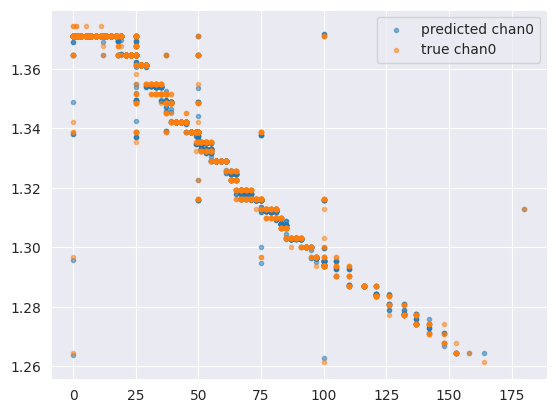

In [48]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [49]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.3123522107352137

In [50]:
2.4 - pred

1.0876477892647862